1) 개요

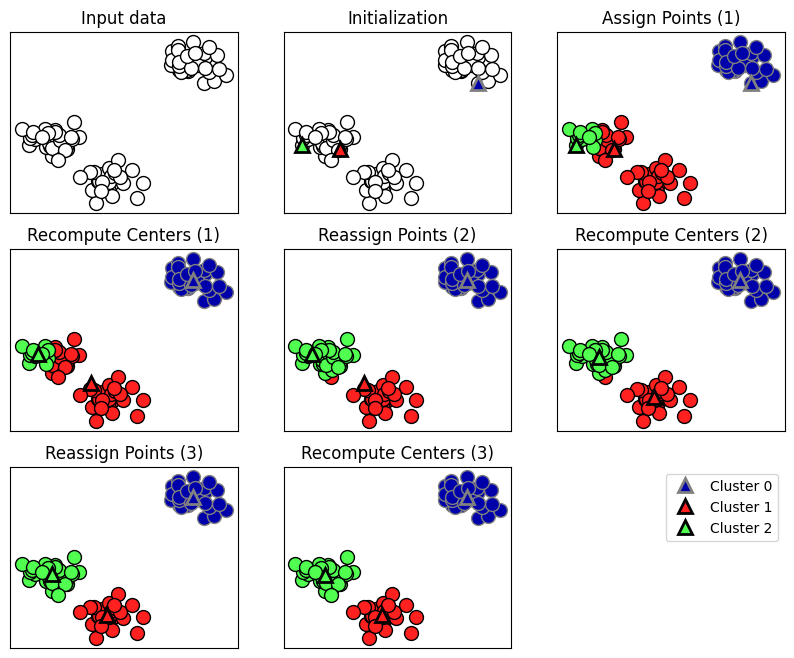

In [2]:
# kmeans 알고리즘에 대한 설명
import mglearn
mglearn.plots.plot_kmeans_algorithm()

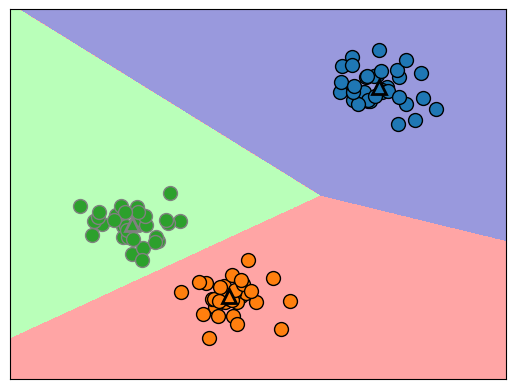

In [3]:
# kmeans 경계 표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [4]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
#2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
#모형이 분류한 라벨
print(kmeans.labels_)
#새로운 값에 대한 분류
X_new=np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))
#중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


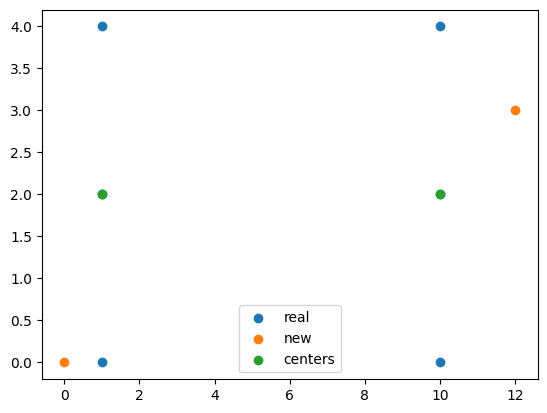

In [5]:
plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0], X_new[:,1] ,label='new')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)
# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
# 모형이 분류한 값
lbl=model.labels_
lbl

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [10]:
#예측한 값
pred = model.predict(X)
print(pred)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [11]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

0.0

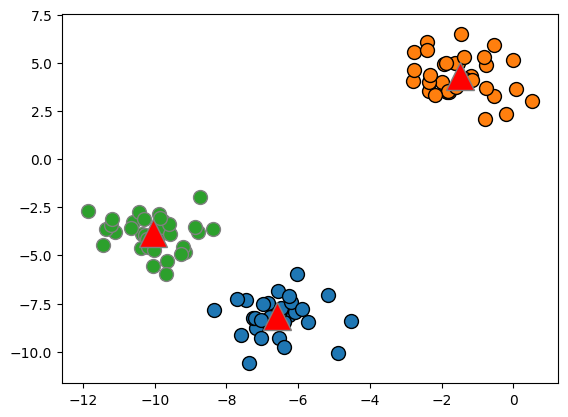

In [12]:
#3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')
#centers
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', c='r', s=20)
plt.show()

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\clus

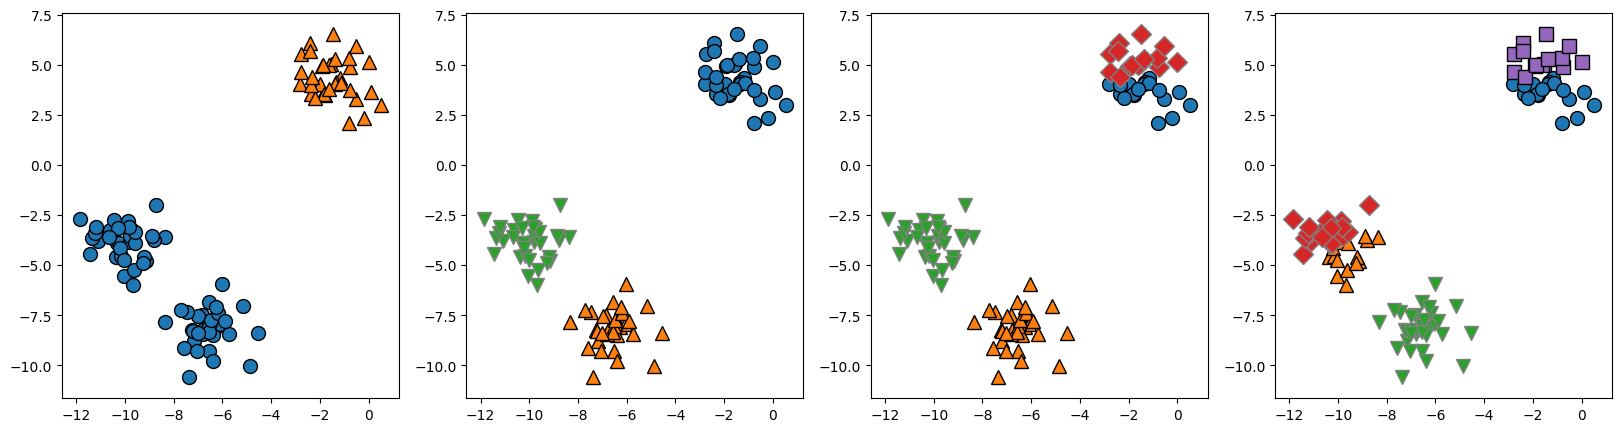

In [13]:
from matplotlib import pyplot as plt

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1

plt.show()